Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Subsest of colums used for example: LotArea	OverallQual	YearBuilt	RoofStyle	CentralAir	SalePrice.

Data are interpreted as continuos and categorical variables


In [46]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# reading given data and visualizing it
df = pd.read_csv("train.csv",sep=',')
df.head()

,Id,LotArea,Utilities,HouseStyle,OverallQual,OverallCond,YearRemodAdd,HeatingQC,KitchenQual,Functional,GarageType,SaleType,SalePrice
0,1,8450,AllPub,2Story,7,5,2003,Ex,Gd,Typ,Attchd,WD,208500
1,2,9600,AllPub,1Story,6,8,1976,Ex,TA,Typ,Attchd,WD,181500
2,3,11250,AllPub,2Story,7,5,2002,Ex,Gd,Typ,Attchd,WD,223500
3,4,9550,AllPub,2Story,7,5,1970,Gd,Gd,Typ,Detchd,WD,140000
4,5,14260,AllPub,2Story,8,5,2000,Ex,Gd,Typ,Attchd,WD,250000


----
LotArea (numeric / continuous) - Nurodomas koks yra nekilnojamo turto plotas.

Utilities (categorical / categorical) - Teikiamos miesto paslaugos (Elektra, šildymas, vandentiekis).

HouseStyle (categorical / categorical) - Būsto tipas. Nusako kelių aukštų, butas ar namas.

OverallQual (numeric / continuous) - Pasitenkinimo skalė dešimtbalėje sistemoje.

OverallCond (numeric / continuous) - Būsto būklė dešimtbalėje skalėje.

YearRemodAdd (numeric / continuous) -  Nurodomi metai, kada buvo renovuotas būstas. Jeigu nebuvo renovuotas - nurodomi pastatymo metai.

HeatingQC (categorical / categorical) - Namo apšiltinimo kokybė.

KitchenQual (categorical / categorical) - Nurodoma virtuvės būklė.

Functional (categorical / categorical) - Nurodomas būsto funkcionalumas.

GarageType (categorical / categorical) - Nurodomas garažo tipas ir ar yra garažas.

SaleType (categorical / categorical) - Nurodoma koks buvo pardavimo tipas.

Target: SalePrice (numeric / continuous) - Kaina už kurią buvo parduotas butas.

----

***LotArea***

array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

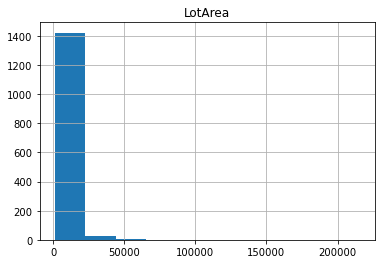

In [48]:
# LotaArea analysis
df.hist(column=['LotArea'])

<AxesSubplot:>

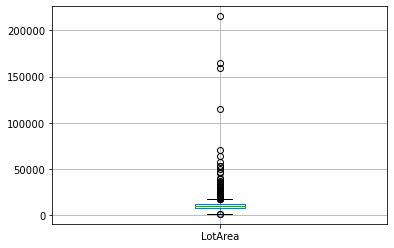

In [49]:
df.boxplot(column=['LotArea'])

There are several options how to fix data. 
   * remove entire records with outlier from dataset
   * assign valid upper bound value to the outliers (clamp transformation)
   * other
   
The option can be selected based on the practice and logical insigts, but at scrupulous scenario many options can be analysed and the most appropriate one selected.

In [50]:
# let's use the clamp transformation in this example  

Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

upperFilter = (df['LotArea'] >= Q3 + 1.5 *IQR)
lowerFilter = (df['LotArea'] <= Q1 - 1.5 *IQR)
df.loc[upperFilter,['LotArea']]  = Q3 + 1.5 *IQR
df.loc[lowerFilter,['LotArea']]  = Q1 - 1.5 *IQR

It must be noted, that same transformation must be applied to the original model, before passing the new data instance to decision making model.

Also, in real life applications, an option should be considered to perform data validation and inform user or forward exception, that in case of outliers data prediction model may work inapropriate.


array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

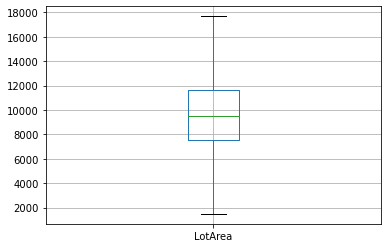

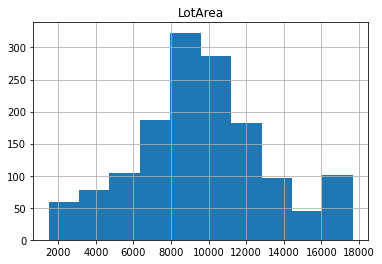

In [51]:
df.boxplot(column=['LotArea'])
df.hist(column=['LotArea'])

<AxesSubplot:>

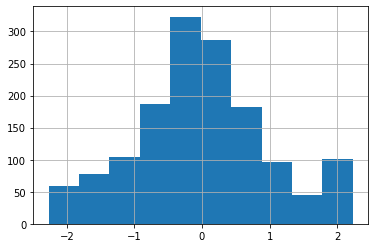

In [52]:
standartizedDf=(df['LotArea']-df['LotArea'].mean())/df['LotArea'].std()
standartizedDf.hist()

Normalized

<AxesSubplot:>

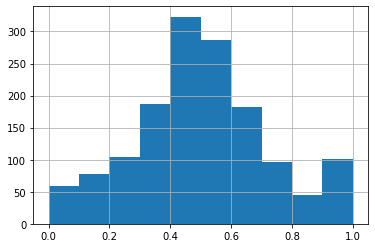

In [53]:
normalizedDf=(df['LotArea']-df['LotArea'].min())/(df['LotArea'].max()-df['LotArea'].min())
normalizedDf.hist()

***'Utilities'***

In [54]:
#df.boxplot(column=['Utilities'])
#df.hist(column=['Utilities'])
print(df.groupby(['Utilities']).size().reset_index(name = 'counts'))

  Utilities  counts
0    AllPub    1459
1    NoSeWa       1


Kadangi matome, kad yra 2 klasės, tačiau vienoje jų yra tik 1 įrašas. Šių duomenų tyrime nenaudosime.

***HouseStyle***

In [55]:
print(df.groupby(['HouseStyle']).size().reset_index(name = 'counts'))

  HouseStyle  counts
0     1.5Fin     154
1     1.5Unf      14
2     1Story     726
3     2.5Fin       8
4     2.5Unf      11
5     2Story     445
6     SFoyer      37
7       SLvl      65


Atlikus "HouseStyle" kategorinių duomneų analizę matoma, kad yra 7 klasės, o įrašų kiekvienoje iš jų yra ne mažai, todėl verta naudoti šiuos duomenis tyrimui.

***`OverallQual`***

   OverallQual  counts
0            1       2
1            2       3
2            3      20
3            4     116
4            5     397
5            6     374
6            7     319
7            8     168
8            9      43
9           10      18
                Id       LotArea  OverallQual  OverallCond  YearRemodAdd  \
count  1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean    730.500000   9647.388014     6.099315     5.575342   1984.865753   
std     421.610009   3594.356399     1.382997     1.112799     20.645407   
min       1.000000   1481.500000     1.000000     1.000000   1950.000000   
25%     365.750000   7553.500000     5.000000     5.000000   1967.000000   
50%     730.500000   9478.500000     6.000000     5.000000   1994.000000   
75%    1095.250000  11601.500000     7.000000     6.000000   2004.000000   
max    1460.000000  17673.500000    10.000000     9.000000   2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.19

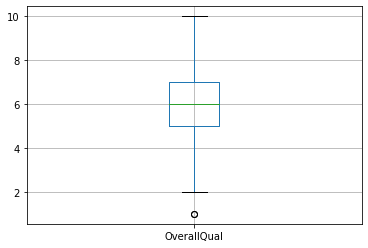

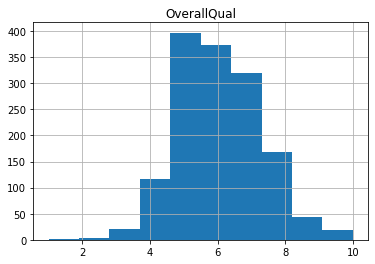

In [56]:
#df.hist(column=['OverallQual'])
df.boxplot(column=['OverallQual'])
df.hist(column=['OverallQual'])
print(df.groupby(['OverallQual']).size().reset_index(name = 'counts'))
print(df.describe())

***OverallCond***

   OverallCond  counts
0            1       1
1            2       5
2            3      25
3            4      57
4            5     821
5            6     252
6            7     205
7            8      72
8            9      22


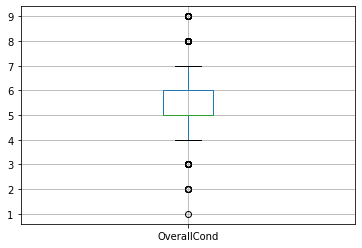

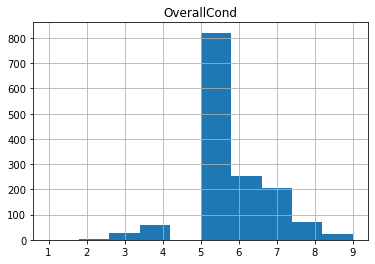

In [57]:
df.boxplot(column=['OverallCond'])
df.hist(column=['OverallCond'])
print(df.groupby(['OverallCond']).size().reset_index(name = 'counts'))

Peržiūrėjus 'OveralCond' duomenis matome, kad duomenų pasiskirstymas yra pakankamas juos naudoti tyrimui.

***YearRemodAdd***

    YearRemodAdd  counts
0           1950     178
1           1951       4
2           1952       5
3           1953      10
4           1954      14
..           ...     ...
56          2006      97
57          2007      76
58          2008      40
59          2009      23
60          2010       6

[61 rows x 2 columns]


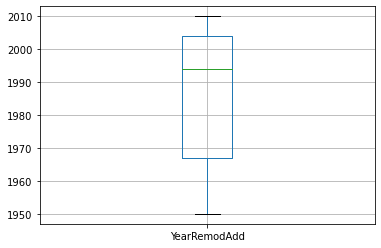

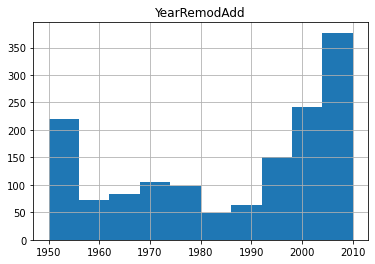

In [58]:
df.boxplot(column=['YearRemodAdd'])
df.hist(column=['YearRemodAdd'])
print(df.groupby(['YearRemodAdd']).size().reset_index(name = 'counts'))

Iš šių duomenų statistikos matome, kad nėra labai didelių duomenų reikšmių kiekio nuokrypių, todėl nereikia taikyti reikšmių koregavimo. Tačiau reikia atlikti duomenų stadartizavimą arba normalizavimą.

Standartizuoti duomenys

<AxesSubplot:>

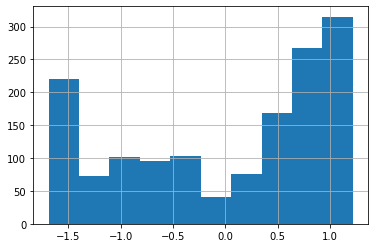

In [59]:
standartizedDf=(df['YearRemodAdd']-df['YearRemodAdd'].mean())/df['YearRemodAdd'].std()
standartizedDf.hist()

Normalizuoti duomenys

<AxesSubplot:>

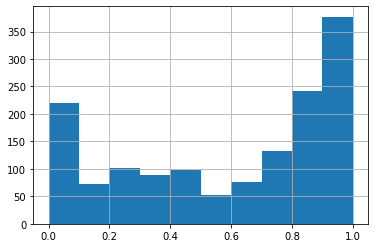

In [60]:
normalizedDf=(df['YearRemodAdd']-df['YearRemodAdd'].min())/(df['YearRemodAdd'].max()-df['YearRemodAdd'].min())
normalizedDf.hist()

***HeatingQC***

In [61]:
print(df.groupby(['HeatingQC']).size().reset_index(name = 'counts'))

  HeatingQC  counts
0        Ex     741
1        Fa      49
2        Gd     241
3        Po       1
4        TA     428


Šiuos duomenis būtų galima konvertuoti į skaitines reikšmes 5 balų skalėje. 5 - Ex, Gd - 4, TA - 3, Fa - 2, Po - 1. Duomenys yra pakankamai pasiskirstę ir neturi didelių nuokrypių. Todėl juos galima naudoti tyime.

In [62]:
df = df.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1], )
print(df.groupby(['HeatingQC']).size().reset_index(name = 'counts'))

   HeatingQC  counts
0          1       1
1          2      49
2          3     428
3          4     241
4          5     741


Konvertavus šiuos duomenis galima pritaikyti tolydžių duomenų analizavimo metodus.

array([[<AxesSubplot:title={'center':'HeatingQC'}>]], dtype=object)

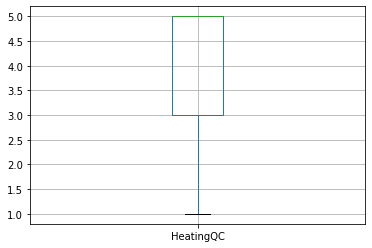

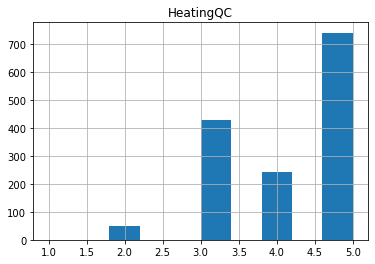

In [63]:
df.boxplot(column=['HeatingQC'])
df.hist(column=['HeatingQC'])

Iš histogramos matome, kad duomenų pasiskirstymas yra eksponentinis.

***KitchenQual***

In [64]:
print(df.groupby(['KitchenQual']).size().reset_index(name = 'counts'))

   KitchenQual  counts
0            2      39
1            3     735
2            4     586
3            5     100


Šiuos duomenis būtų galima konvertuoti į skaitines reikšmes 4 balų skalėje. 4 - Ex, Gd - 3, TA - 2, Fa - 1. Duomenys yra pakankamai pasiskirstę ir neturi didelių nuokrypių. Todėl juos galima naudoti tyime.

array([[<AxesSubplot:title={'center':'KitchenQual'}>]], dtype=object)

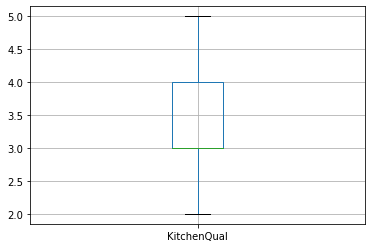

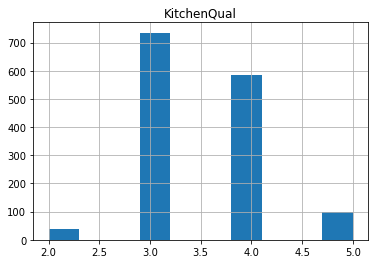

In [65]:
df.boxplot(column=['KitchenQual'])
df.hist(column=['KitchenQual'])

Iš histogramos matome, kad duomenų pasiskirstymas yra normalus.

***Functional***

In [66]:
print(df.groupby(['Functional']).size().reset_index(name = 'counts'))

  Functional  counts
0       Maj1      14
1       Maj2       5
2       Min1      31
3       Min2      34
4        Mod      15
5        Sev       1
6        Typ    1360


Reikšmės yra sąlyginai mažai pasiskirstę, todėl šių duomenų neverta naudoti tyrime.

***GarageType***

In [67]:
print(df.groupby(['GarageType']).size().reset_index(name = 'counts'))

  GarageType  counts
0     2Types       6
1     Attchd     870
2    Basment      19
3    BuiltIn      88
4    CarPort       9
5     Detchd     387


Reikšmės yra gerai pasiskirstę. Duomenis galima naudoti tyrime.

***SaleType***

In [68]:
print(df.groupby(['SaleType']).size().reset_index(name = 'counts'))

  SaleType  counts
0      COD      43
1      CWD       4
2      Con       2
3    ConLD       9
4    ConLI       5
5    ConLw       5
6      New     122
7      Oth       3
8       WD    1267


Duomenys yra mažai pasiskirstę, tyimo metu neverta naudoti.

***SalePrice (Target)***

<AxesSubplot:title={'center':'SalePrice'}>

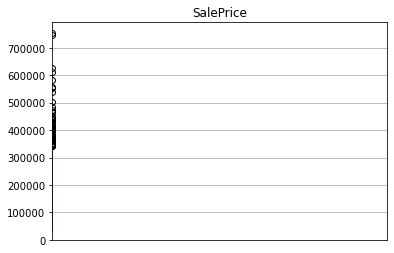

In [69]:
df.hist(column = ['SalePrice'])
df.boxplot(column = ['SalePrice'])

TODO:
*   Make analysis of the rest variables
*   Perform data limitation / model limitation report.
*   Fill Data quality reports


